In [1]:
!pip install wordcloud

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data=pd.read_excel('2단계 하락 상위 20%.xlsx')
data.head()

,제품명,구매수,상품설명
0,[La belle rose]언더 베이직 유넥티,30,매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D
1,사나 슬림핏 골지가디건,25,부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
2,어링 모헤어니트,25,부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)
3,카디비 머메이드 롱스커트,18,고급스럽고 우아한 머메이드라인의 볼륨감있는 바디라인으로 연출되는 롱스커트♡
4,퓨얼 플리츠 롱스커트,18,"움직일때마다 살랑 살랑,청순한 실루엣으로 연출해주는 롱 플리츠 스커트♥<br>부드럽..."


In [5]:
#경고제어
import warnings
warnings.simplefilter("ignore") # 일치하는 경고 인쇄 x, simplefilter : 경고 필터 명세 목록에 간단한 항목을 삽입

#텍스트 분석에 필요한 konlpy 불러오기 및 버전 확인
import konlpy
konlpy.__version__

'0.5.2'

In [6]:
#KoNLPy의 OKT(형태소 분석기) 불러오기
from konlpy.tag import Okt

okt=Okt()
print(okt.pos("안녕하세요"))

[('안녕하세요', 'Adjective')]


In [7]:
!pip install nltk

In [8]:
import nltk
from konlpy.tag import Okt
t=Okt()

In [9]:
data.상품설명.astype('str')

0                 매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D
1                        부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
2                  부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)
3              고급스럽고 우아한 머메이드라인의 볼륨감있는 바디라인으로 연출되는 롱스커트♡
4      움직일때마다 살랑 살랑,청순한 실루엣으로 연출해주는 롱 플리츠 스커트♥<br>부드럽...
                             ...                        
142             잔잔한 체크 패턴이 포인트가 되어줄 스커트!<br>기장 옵션이 있어요!♥
143      여리여리한 무드로 연출되는 꽈배기 브이넥니트♥<br>부들부들한 터치감으로 포근해요:)
144        프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
145              포인트 주기 좋은 패션 아이템! 레이스나시로 꾸안꾸룩을 완성해보세요:)
146    찰랑찰랑 부드러운 터치감과 봄&여름시즌에 어울리는 산뜻한 컬러감으로 구성된 데이원라...
Name: 상품설명, Length: 147, dtype: object

In [10]:
content_text=''

for each_line in data.상품설명.astype('str'):
    content_text=content_text + each_line + '\n'

In [11]:
print(data.상품설명)
print(data.shape)

0                 매일매일 입고 싶은 차르르핏 베이직 티셔츠♡컬러별 소장 추천드려요:D
1                        부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
2                  부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)
3              고급스럽고 우아한 머메이드라인의 볼륨감있는 바디라인으로 연출되는 롱스커트♡
4      움직일때마다 살랑 살랑,청순한 실루엣으로 연출해주는 롱 플리츠 스커트♥<br>부드럽...
                             ...                        
142             잔잔한 체크 패턴이 포인트가 되어줄 스커트!<br>기장 옵션이 있어요!♥
143      여리여리한 무드로 연출되는 꽈배기 브이넥니트♥<br>부들부들한 터치감으로 포근해요:)
144        프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
145              포인트 주기 좋은 패션 아이템! 레이스나시로 꾸안꾸룩을 완성해보세요:)
146    찰랑찰랑 부드러운 터치감과 봄&여름시즌에 어울리는 산뜻한 컬러감으로 구성된 데이원라...
Name: 상품설명, Length: 147, dtype: object
(147, 3)


In [12]:
tokens_ko=t.morphs(content_text)
tokens_ko

['매',
 '일',
 '매일',
 '입고',
 '싶은',
 '차르르',
 '핏',
 '베이직',
 '티셔츠',
 '♡',
 '컬러',
 '별',
 '소장',
 '추천',
 '드려요',
 ':',
 'D',
 '\n',
 '부들부들한',
 '착용',
 '감',
 '으로',
 '손',
 '이',
 '자주',
 '갈',
 '슬림핏',
 '골지',
 '가디건',
 '♡',
 '\n',
 '부드러운',
 '착용',
 '감',
 '♥',
 '부',
 '해보이지',
 '않고',
 '여리',
 '여리한',
 '무드',
 '의',
 '골지',
 '니트',
 '에요',
 ':)',
 '\n',
 '고급스럽고',
 '우아한',
 '머메이드',
 '라인',
 '의',
 '볼륨',
 '감있는',
 '바디',
 '라인',
 '으로',
 '연출',
 '되는',
 '롱',
 '스커트',
 '♡',
 '\n',
 '움직일',
 '때',
 '마다',
 '살랑',
 '살랑',
 ',',
 '청순한',
 '실루엣',
 '으로',
 '연출',
 '해주는',
 '롱',
 '플',
 '리츠',
 '스커트',
 '♥',
 '<',
 'br',
 '>',
 '부드럽고',
 '은은한',
 '컬러',
 '감',
 '이',
 '너무',
 '예쁘답니다',
 '!',
 '\n',
 'nan',
 '\n',
 '청순',
 '+',
 '섹시',
 '♥',
 '꾸민듯',
 '안',
 '꾸민듯',
 '포인트',
 '주기',
 '좋은',
 '슬림핏',
 '골지',
 '티셔츠',
 '에요',
 ':)',
 '\n',
 '까다롭게',
 '제작',
 '한',
 '프롬',
 '데이',
 '원',
 '메이드',
 '데님',
 '♥',
 '<',
 'br',
 '>',
 '실물',
 '로',
 '퀄리티',
 '를',
 '확인',
 '해',
 '주세요',
 ':))',
 '\n',
 '부들',
 '부들',
 '쫀쫀',
 '하고',
 '소프트',
 '한',
 '텍스쳐',
 '의',
 '깔끔한',
 '레깅스',
 '팬츠',
 '♥',


In [13]:
ko=nltk.Text(tokens_ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

2604
656


In [15]:
ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200) # 가장 많이 나온 단어 200개

[('\n', 147),
 ('♥', 103),
 ('으로', 70),
 ('한', 59),
 ('br', 51),
 ('>', 50),
 (':)', 41),
 ('<', 40),
 ('로', 36),
 ('의', 35),
 (',', 33),
 ('에요', 31),
 ('♡', 29),
 ('추천', 27),
 ('무드', 27),
 ('연출', 27),
 ('이', 26),
 ('감', 25),
 ('좋은', 25),
 ('!', 21),
 ('컬러', 20),
 ('착용', 20),
 ('아이템', 20),
 ('라인', 18),
 ('에', 18),
 ('을', 17),
 ('룩', 17),
 ('과', 17),
 ('원피스', 16),
 ('포인트', 15),
 ('쫀쫀', 15),
 ('팬츠', 15),
 ('하기', 15),
 ('소재', 15),
 ('디자인', 15),
 ('티셔츠', 14),
 ('스커트', 14),
 ('좋아요', 14),
 ('핏', 13),
 ('게', 13),
 ('드려요', 12),
 ('골지', 12),
 ('니트', 12),
 ('되는', 12),
 ('있는', 12),
 ('활용', 11),
 ('소장', 10),
 ('가디건', 10),
 ('여리한', 10),
 ('롱', 10),
 ('러블리', 10),
 ('데', 10),
 ('일리', 10),
 ('슬림', 10),
 ('데이', 9),
 ('티', 9),
 ('바디', 8),
 ('원', 8),
 ('가', 8),
 ('블라우스', 8),
 ('입기', 8),
 ('베이직', 7),
 ('해주는', 7),
 ('nan', 7),
 ('를', 7),
 ('꾸안꾸룩', 7),
 ('로맨틱', 7),
 ('이에요', 7),
 ('!<', 7),
 (':', 6),
 ('D', 6),
 ('은은한', 6),
 ('프롬', 6),
 ('해', 6),
 ('색감', 6),
 ('도', 6),
 ('적극', 6),
 ('스퀘어', 6),
 ('분위기', 6),


In [16]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','좋','1','는','로','으로','2','것','은','다',',','니다','대','를','2017','들','데','..','의','때','겠','고','게','네요','한','일','할','10','?','하는','06','주','려고','인데','거','좀','는데','-','ㅎㅎ','하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','지','있','못','후','중','줄','6','과','어떤','기본','!!','단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200)

[('\n', 147),
 ('♥', 103),
 ('br', 51),
 ('>', 50),
 (':)', 41),
 ('<', 40),
 ('에요', 31),
 ('♡', 29),
 ('추천', 27),
 ('무드', 27),
 ('연출', 27),
 ('감', 25),
 ('좋은', 25),
 ('!', 21),
 ('컬러', 20),
 ('착용', 20),
 ('아이템', 20),
 ('라인', 18),
 ('룩', 17),
 ('원피스', 16),
 ('포인트', 15),
 ('쫀쫀', 15),
 ('팬츠', 15),
 ('하기', 15),
 ('소재', 15),
 ('디자인', 15),
 ('티셔츠', 14),
 ('스커트', 14),
 ('좋아요', 14),
 ('핏', 13),
 ('드려요', 12),
 ('골지', 12),
 ('니트', 12),
 ('되는', 12),
 ('활용', 11),
 ('소장', 10),
 ('가디건', 10),
 ('여리한', 10),
 ('롱', 10),
 ('러블리', 10),
 ('일리', 10),
 ('슬림', 10),
 ('데이', 9),
 ('티', 9),
 ('바디', 8),
 ('원', 8),
 ('블라우스', 8),
 ('입기', 8),
 ('베이직', 7),
 ('해주는', 7),
 ('nan', 7),
 ('꾸안꾸룩', 7),
 ('로맨틱', 7),
 ('이에요', 7),
 ('!<', 7),
 (':', 6),
 ('D', 6),
 ('은은한', 6),
 ('프롬', 6),
 ('해', 6),
 ('색감', 6),
 ('적극', 6),
 ('스퀘어', 6),
 ('분위기', 6),
 ('강력', 6),
 ('드리는', 6),
 ('고급스러운', 6),
 ('인', 6),
 ('데일', 6),
 ('리하', 6),
 ('되어요', 6),
 ('여름', 6),
 ('시즌', 6),
 ('별', 5),
 ('부들부들한', 5),
 ('부드러운', 5),
 ('여리', 5),
 ('부드럽고', 5),
 

In [31]:
review_stopwords=['\n','♥',':)','♡','<','br','>',':','D','!','+','원','넥','위','매','일','별','손','갈','부','플','nan','안',':))','터','티','기','나','반','극','!^_^','인','일','!<','에요','추천','연출']
for word in review_stopwords:
    stop_words.append(word)

In [37]:
review_stopwords2=['좋은','디자인','해','무드','감']
for word in review_stopwords2:
    stop_words.append(word)

In [38]:
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('컬러', 20),
 ('착용', 20),
 ('아이템', 20),
 ('라인', 18),
 ('룩', 17),
 ('원피스', 16),
 ('포인트', 15),
 ('쫀쫀', 15),
 ('팬츠', 15),
 ('하기', 15),
 ('소재', 15),
 ('티셔츠', 14),
 ('스커트', 14),
 ('좋아요', 14),
 ('핏', 13),
 ('드려요', 12),
 ('골지', 12),
 ('니트', 12),
 ('되는', 12),
 ('활용', 11),
 ('소장', 10),
 ('가디건', 10),
 ('여리한', 10),
 ('롱', 10),
 ('러블리', 10),
 ('일리', 10),
 ('슬림', 10),
 ('데이', 9),
 ('바디', 8),
 ('블라우스', 8),
 ('입기', 8),
 ('베이직', 7),
 ('해주는', 7),
 ('꾸안꾸룩', 7),
 ('로맨틱', 7),
 ('이에요', 7),
 ('은은한', 6),
 ('프롬', 6),
 ('색감', 6),
 ('적극', 6),
 ('스퀘어', 6),
 ('분위기', 6),
 ('강력', 6),
 ('드리는', 6),
 ('고급스러운', 6),
 ('데일', 6),
 ('리하', 6),
 ('되어요', 6),
 ('여름', 6),
 ('시즌', 6),
 ('부들부들한', 5),
 ('부드러운', 5),
 ('여리', 5),
 ('부드럽고', 5),
 ('꾸민듯', 5),
 ('터치', 5),
 ('매력', 5),
 ('적', 5),
 ('패턴', 5),
 ('신축', 5),
 ('된', 5),
 ('따듯', 5),
 ('루즈', 5),
 ('하게', 5),
 ('즐기기', 5),
 ('연말', 5),
 ('차르르', 4),
 ('고급스럽고', 4),
 ('실루엣', 4),
 ('청순', 4),
 ('섹시', 4),
 ('주기', 4),
 ('제작', 4),
 ('메이드', 4),
 ('데님', 4),
 ('하고', 4),
 ('깔끔한', 4),
 ('산뜻한', 4),

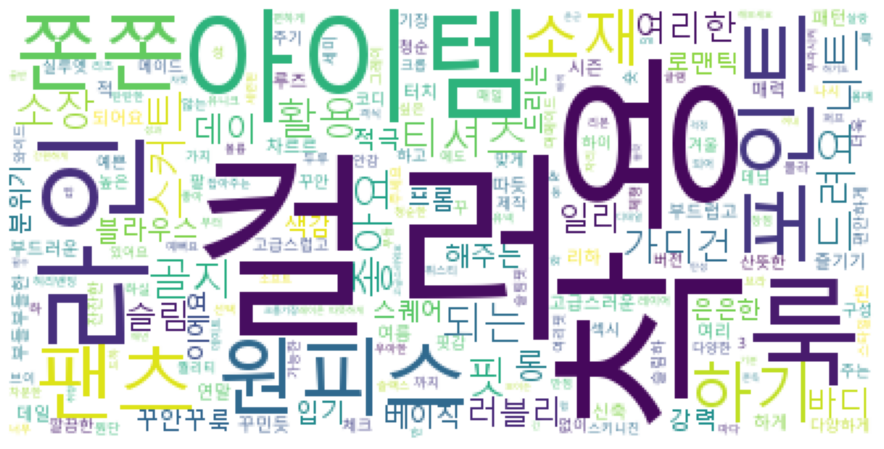

In [39]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path='C:\Windows\Fonts/malgun.ttf',
                   relative_scaling=0.2,
                   background_color='white',).generate_from_frequencies(ko.vocab())

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [40]:
!pip install graphviz

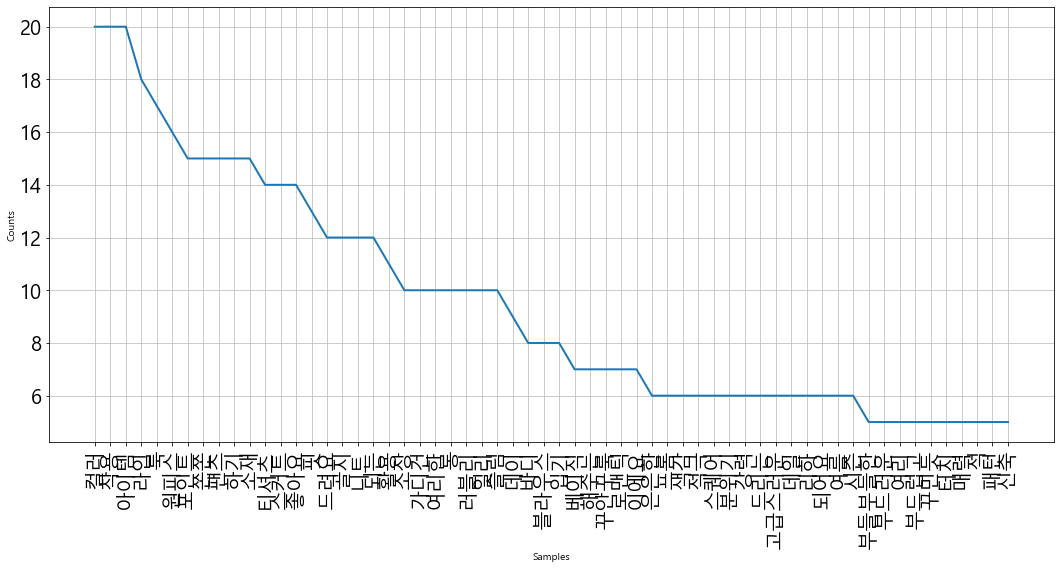

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

plt.figure(figsize=(18,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ko.plot(60)
plt.show()